In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pickle

# Ignore all warnings globally
warnings.filterwarnings("ignore")


# Exploring

In [2]:
df=pd.read_csv("../data/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [3]:
df.shape

(400, 25)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [5]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [6]:
# rename column names to make it more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia']

In [7]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,147.729213,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.598196,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,11.600000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# Printing unique values in data
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [ 11.6   nan 423.  117.  106.   74.  100.  410.  138.   70.  490.  380.
 208.   98.  157. 

The data has lots of typos

# Preprocessing

## Fixing typos

In [11]:
# replace some incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')


In [12]:
# converting necessary columns to numerical type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

### Extracting categorical and numerical columns

In [13]:

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [14]:
df.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,11.6,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [15]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

##  Missing Values

In [16]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [17]:
df[num_cols].isnull().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [18]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [19]:
# filling null values, we will use two methods, random sampling for higher null values and mean/mode sampling for lower null values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [20]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)
    
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [21]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
    
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

## Feature Encoding

In [22]:
# Printing unique values in cat_cols
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [23]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [24]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump
# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Loop through columns and fit_transform LabelEncoder
for column in cat_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

    # Save LabelEncoder object using joblib
    dump(le, f'../model/{column}_label_encoder.joblib')

In [25]:
for column, le in label_encoders.items():
    print(f"Classes for {column}: {le.classes_}")

Classes for red_blood_cells: ['abnormal' 'normal']
Classes for pus_cell: ['abnormal' 'normal']
Classes for pus_cell_clumps: ['notpresent' 'present']
Classes for bacteria: ['notpresent' 'present']
Classes for hypertension: ['no' 'yes']
Classes for diabetes_mellitus: ['no' 'yes']
Classes for coronary_artery_disease: ['no' 'yes']
Classes for appetite: ['good' 'poor']
Classes for peda_edema: ['no' 'yes']
Classes for aanemia: ['no' 'yes']


We used a label encoder to transform the categorical data to numerical data

In [26]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [27]:
# Define the MDRD equation for eGFR calculation
def calculate_egfr(row):
    creatinine = row['serum_creatinine']
    age = row['age']
    systolic_bp = row['blood_pressure']
    
    if pd.notna(creatinine) and pd.notna(age) and pd.notna(systolic_bp):
        return 175 * ((creatinine ** -1.154) * (age ** -0.203) / systolic_bp) * 0.742*100
    else:
        return None

# Apply the eGFR calculation function to create a new column 'eGFR'
df['eGFR'] = df.apply(calculate_egfr, axis=1)



* Stage 0: eGFR ≥ 90 mL/min/1.73 m² Normal range
* Stage 1: 60 ≤ eGFR < 90 mL/min/1.73 m²
* Stage 2: 30 ≤ eGFR < 60 mL/min/1.73 m²
* Stage 3: 15 ≤ eGFR < 30 mL/min/1.73 m²
* Stage 4: eGFR < 15 mL/min/1.73 m² or end-stage renal disease (ESRD)


In [28]:
def label_ckd_stage(row):
    eGFR = row['eGFR']
    
    
    if pd.notna(eGFR):
        
        if eGFR >= 90:
            return 0
        elif 60 <= eGFR < 90:
            return 1
        elif 30 <= eGFR < 60:
            return 2
        elif 15 <= eGFR < 30:
            return 3
        elif eGFR < 15:
            return 4
        else:
            return 'Unknown'
    else:
        return 'Unknown'

# Apply the CKD stage labeling function to create a new column 'CKD_stage'
df['CKD_stage'] = df.apply(label_ckd_stage, axis=1)

In [29]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,eGFR,CKD_stage
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,11.6,...,7800.0,5.2,1,1,0,0,0,0,59.935597,2
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,113.0,...,6000.0,2.9,0,0,0,0,0,0,226.334732,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,7500.0,4.3,0,1,0,1,0,1,35.637890,2
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,6700.0,3.9,1,0,0,1,1,1,18.112637,3
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,7300.0,4.6,0,0,0,0,0,0,49.554542,2
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,7800.0,4.4,1,1,0,0,1,0,56.294709,2
6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,100.0,...,7200.0,5.7,0,0,0,0,0,0,2.011782,4
7,24.0,80.0,1.015,2.0,4.0,1,0,0,0,410.0,...,6900.0,5.0,0,1,0,0,1,0,76.278462,1
8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,138.0,...,9600.0,4.0,1,1,0,0,0,1,27.759499,3
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,12100.0,3.7,1,1,0,1,0,1,6.604041,4


In [30]:
df.iloc[5] 

age                          60.000000
blood_pressure               90.000000
specific_gravity              1.015000
albumin                       3.000000
sugar                         0.000000
red_blood_cells               1.000000
pus_cell                      1.000000
pus_cell_clumps               0.000000
bacteria                      0.000000
blood_glucose_random         74.000000
blood_urea                   25.000000
serum_creatinine              1.100000
sodium                      142.000000
potassium                     3.200000
haemoglobin                  12.200000
packed_cell_volume           39.000000
white_blood_cell_count     7800.000000
red_blood_cell_count          4.400000
hypertension                  1.000000
diabetes_mellitus             1.000000
coronary_artery_disease       0.000000
appetite                      0.000000
peda_edema                    1.000000
aanemia                       0.000000
eGFR                         56.294709
CKD_stage                

In [31]:
df["CKD_stage"].value_counts()

CKD_stage
0    112
2     89
4     72
1     68
3     59
Name: count, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

# Visualizing the Data

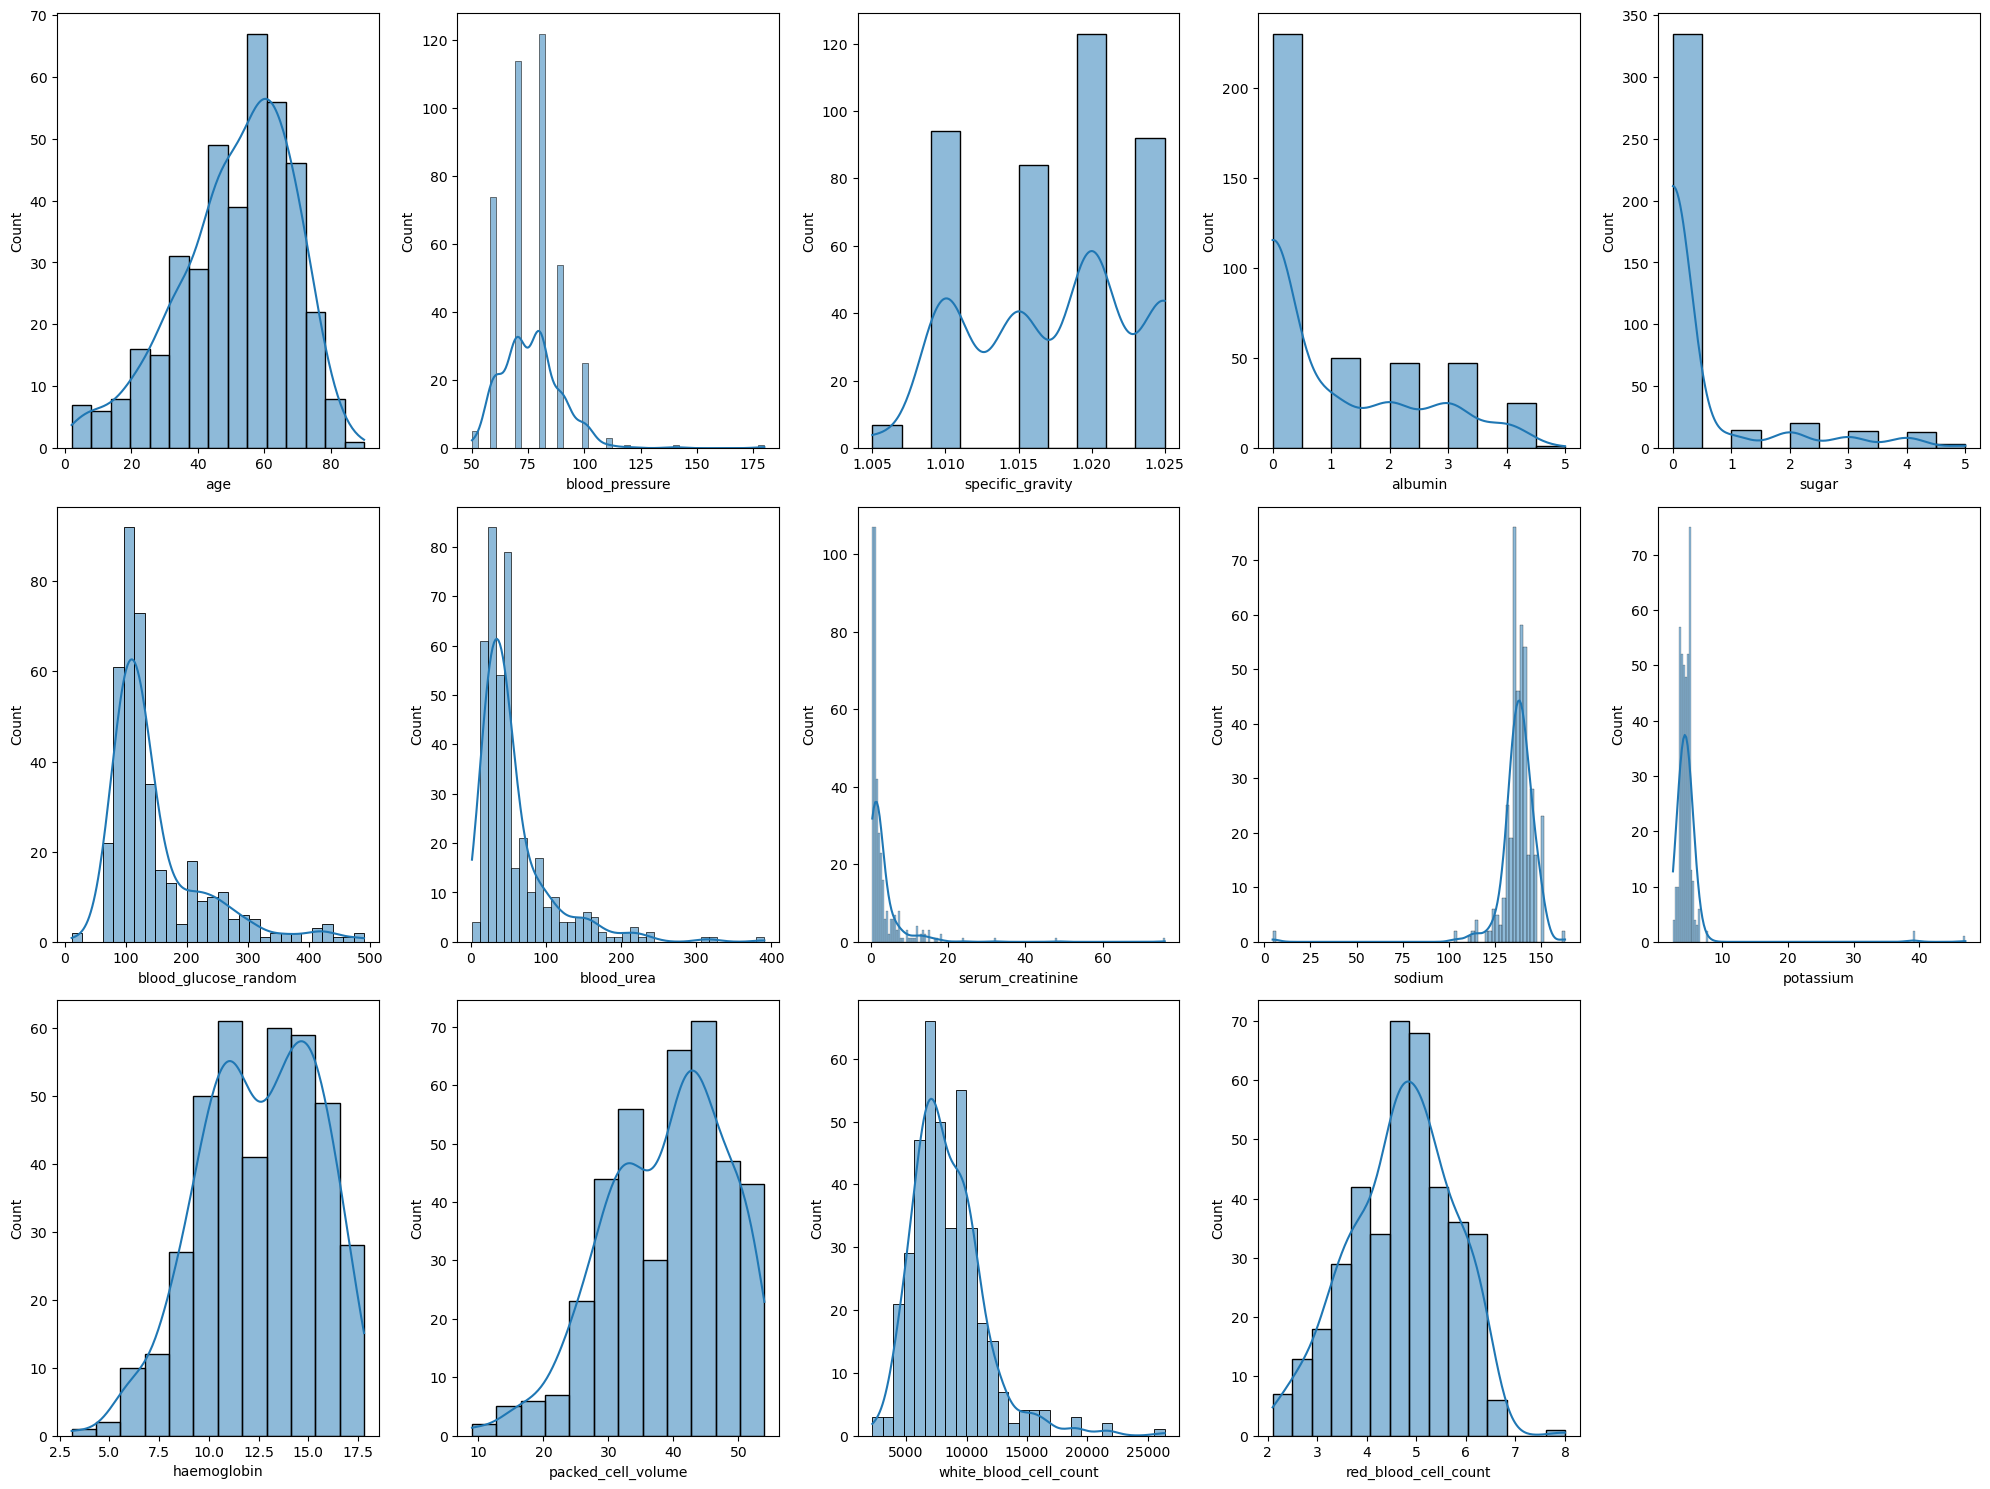

In [33]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

We can see some skewness in the data

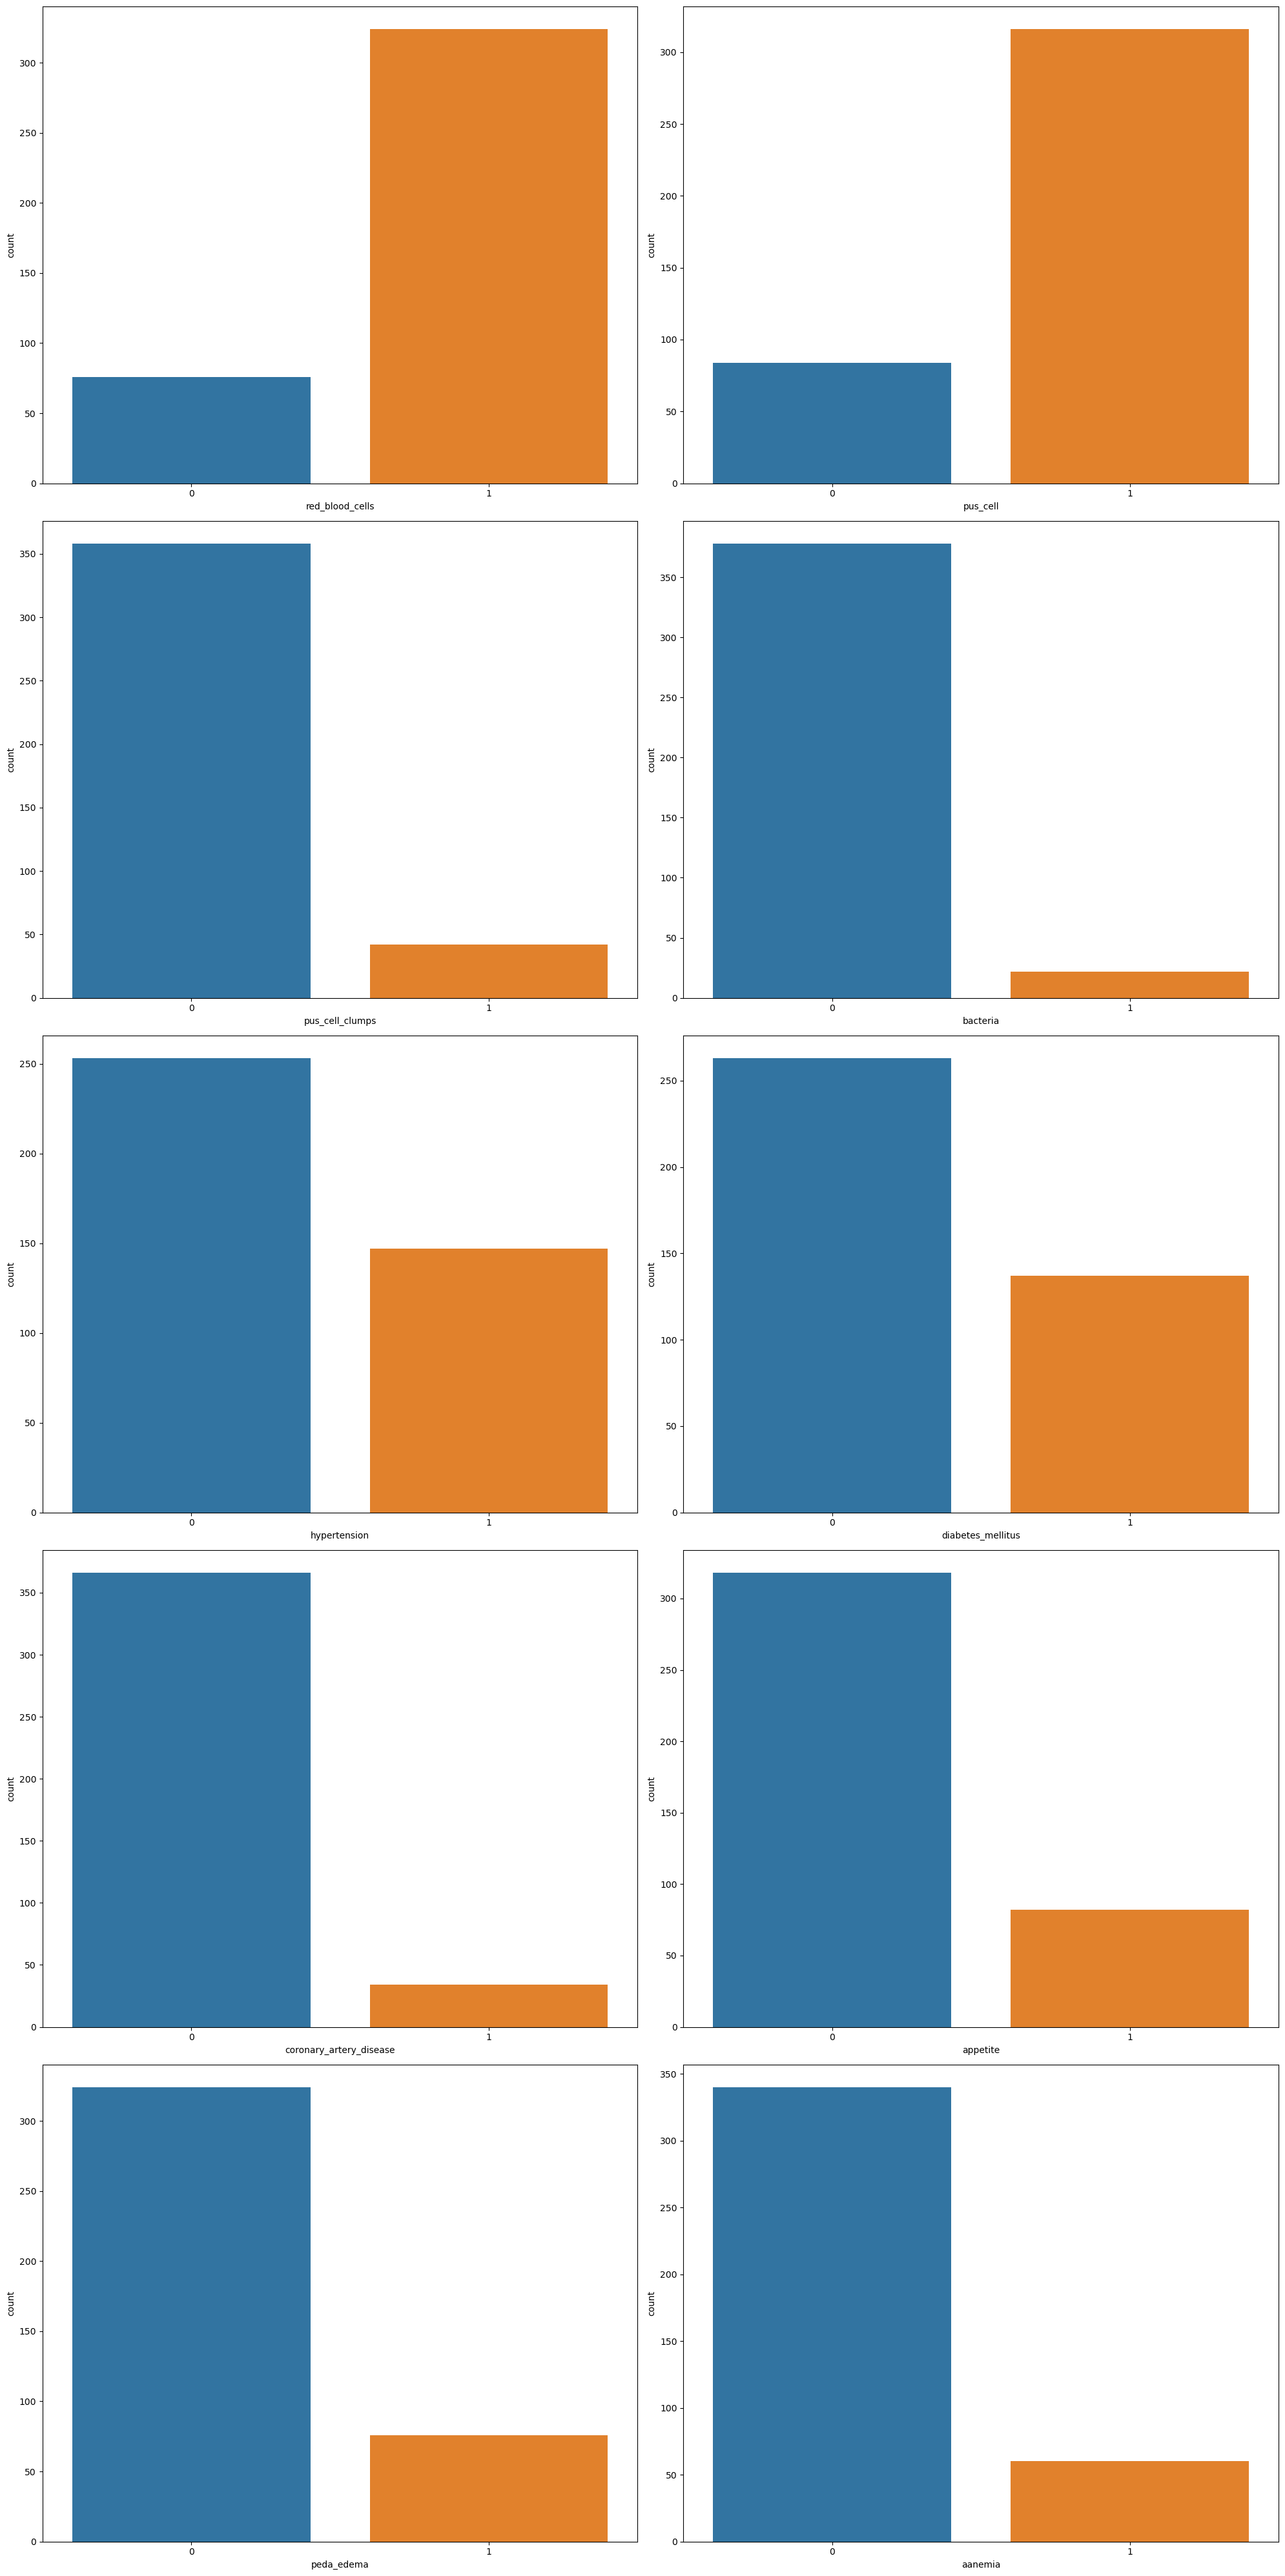

In [34]:
# Checking categorical columns
plt.figure(figsize=(20, 40))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(data=df, x=column)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

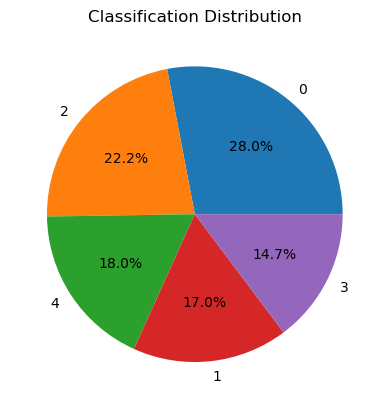

In [35]:
# Checking target class
plt.pie(df['CKD_stage'].value_counts(), labels=df['CKD_stage'].value_counts().index, autopct='%1.1f%%')
plt.title('Classification Distribution')
plt.show()

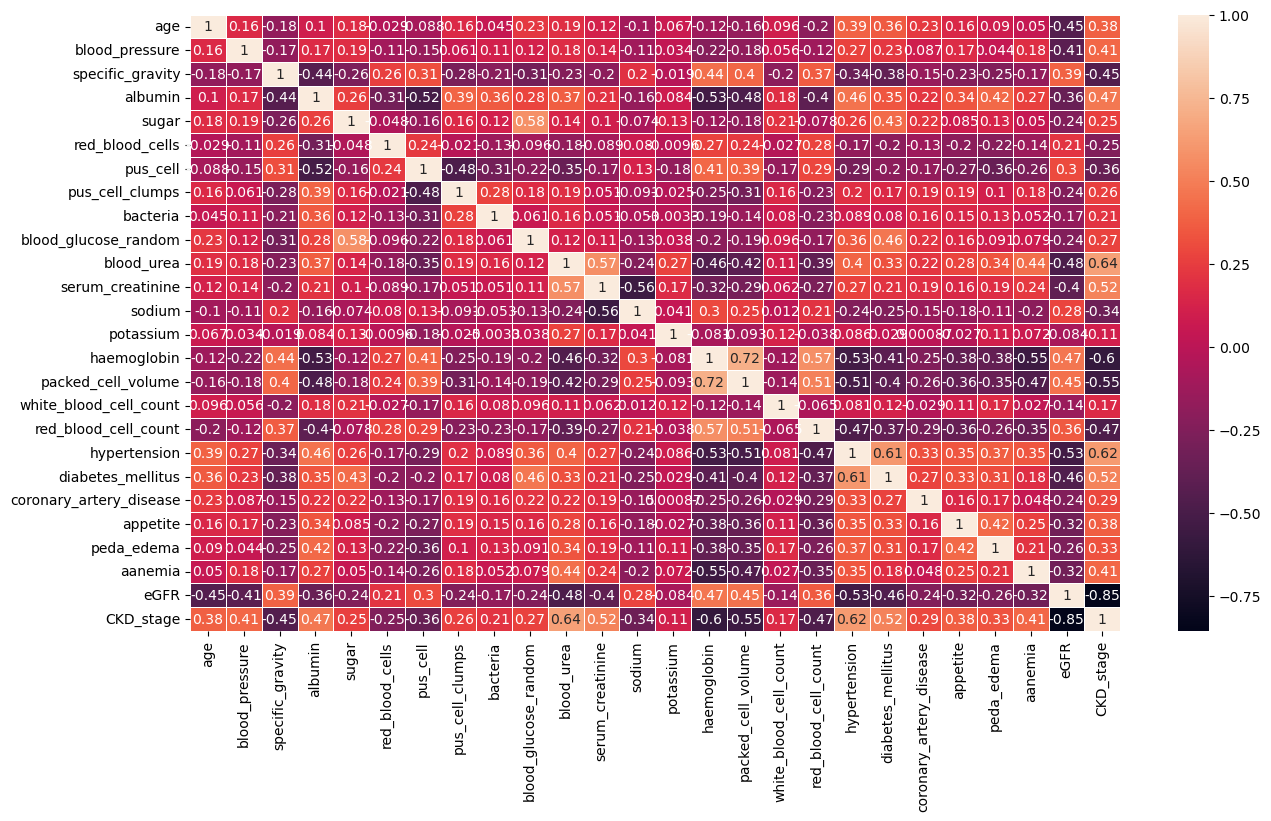

In [36]:
# heatmap of the data
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5)
plt.show()

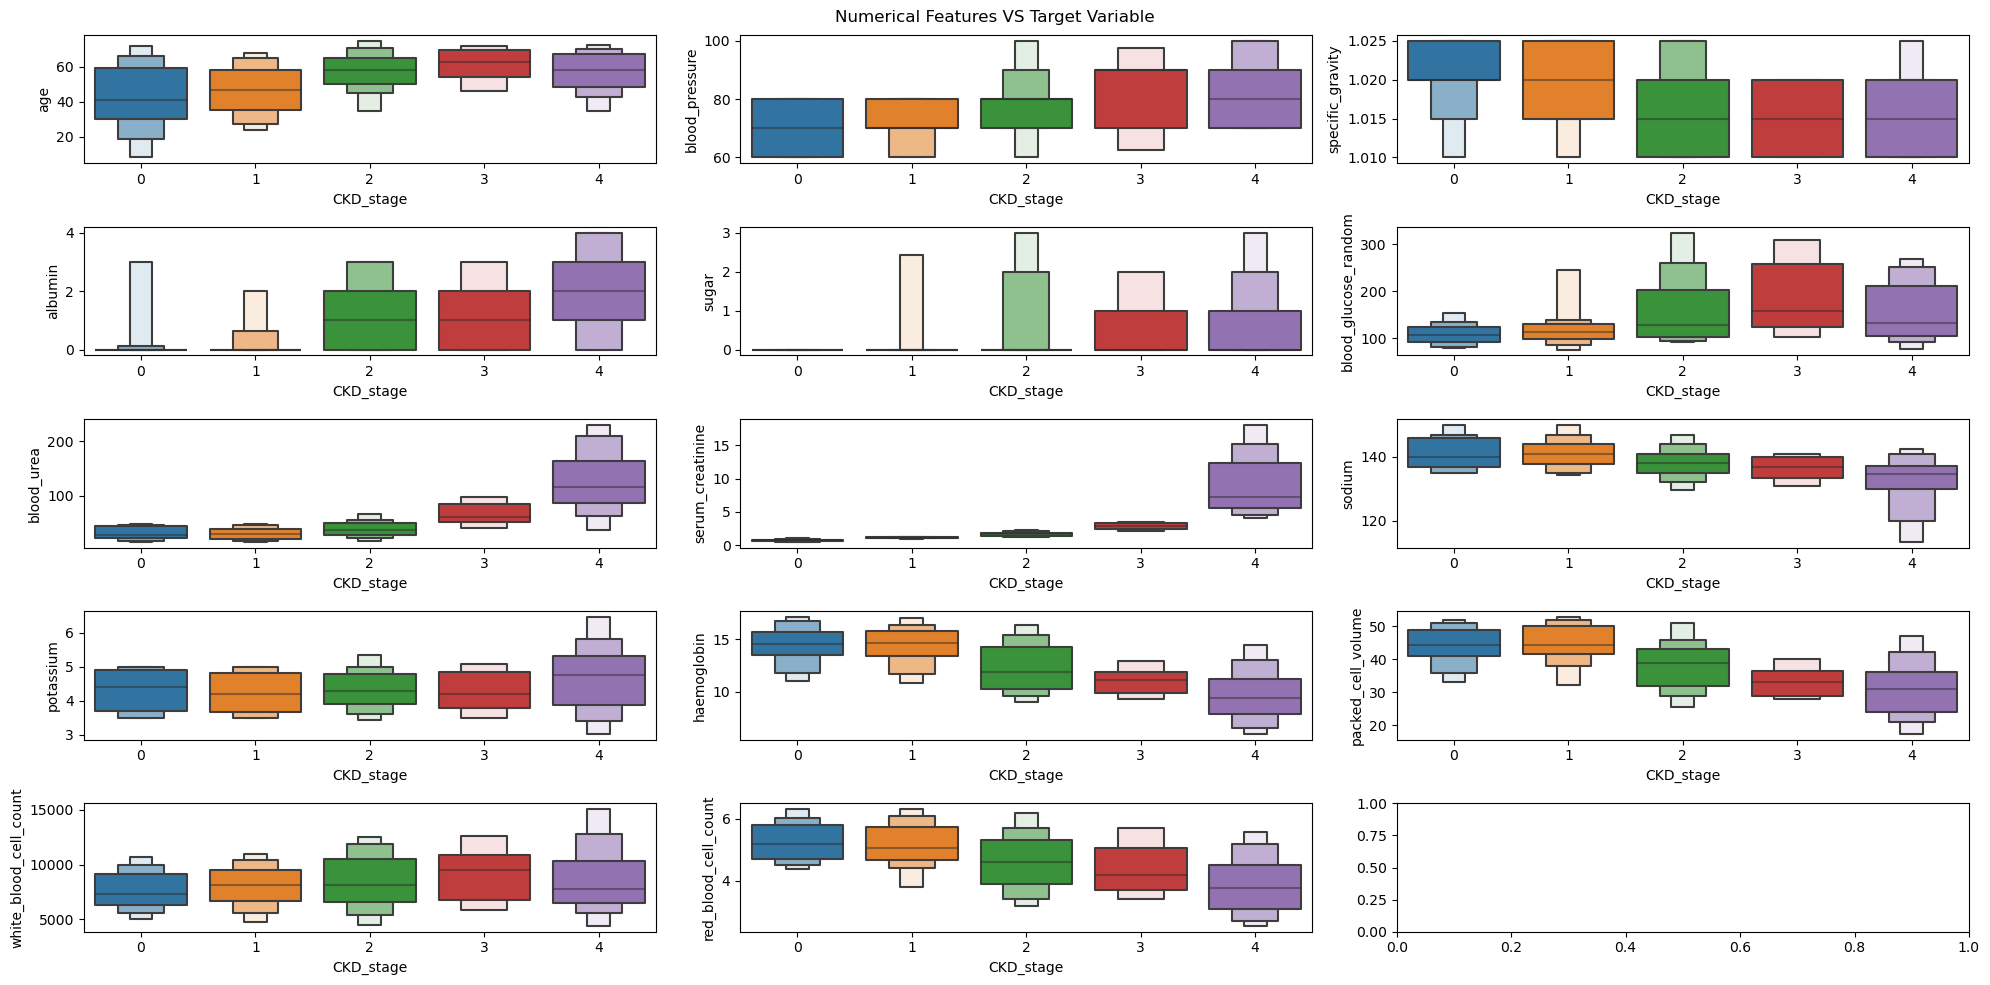

In [37]:
# Creating a boxen plot to show features against the target
n_rows, n_cols = (5,3)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (20, 10))
figure.suptitle('Numerical Features VS Target Variable')

for index, column in enumerate(num_cols):
    
    i,j = (index // n_cols), (index % n_cols)
    bp=sns.boxenplot(y=column, x='CKD_stage', data=df, ax=axes[i,j], showfliers=False)
    axes[i,j].set_xlabel(axes[i,j].get_xlabel())
    axes[i,j].set_ylabel(column)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels())
plt.tight_layout()
plt.show()

We can see here that some values in some features play a role in being diagnosed with that disease.

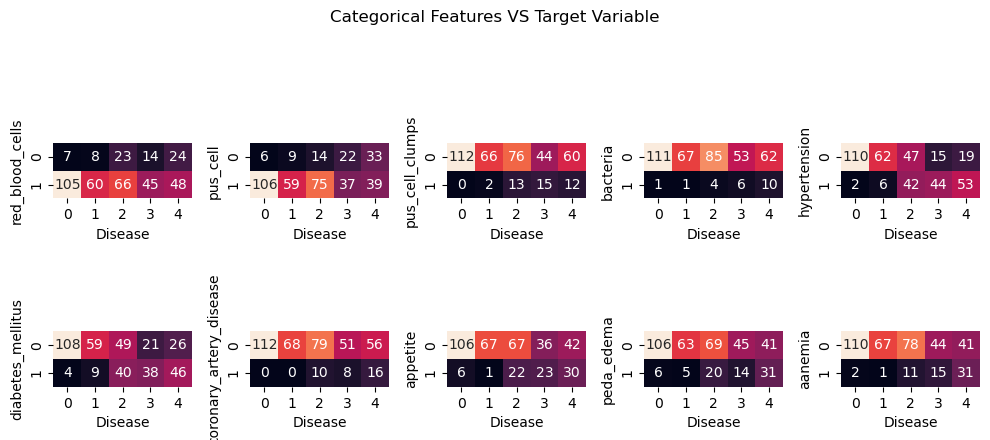

In [38]:
n_rows, n_cols = (2,5)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10, 5))
figure.suptitle('Categorical Features VS Target Variable')

for index, column in enumerate(cat_cols):
    i,j = (index // n_cols), (index % n_cols)
    sns.heatmap(pd.crosstab(df[column], df['CKD_stage']), ax=axes[i,j], square='True', cbar=False, annot=True, fmt='d')
        
    axes[i,j].set_xlabel("Disease")
    axes[i,j].set_ylabel(column)
    
plt.tight_layout()
plt.show()

No much correlation visible here

In [39]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'eGFR', 'CKD_stage'],
      dtype='object')

# Modeling

### Defining Scoring Function

In [40]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Defining Scoring Function
def print_score(clf, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob, multi_class='ovr') * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob, multi_class='ovr') * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        return accuracy_score(y_test, pred) * 100, roc_auc_score(y_test, y_test_prob,multi_class='ovr') * 100

### Splitting Data and Scaling it

In [41]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop("CKD_stage", axis=1)
y = df["CKD_stage"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (400, 25)
'y' shape: (400,)


In [42]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,eGFR
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,11.6,...,44.0,7800.0,5.2,1,1,0,0,0,0,59.935597
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,113.0,...,38.0,6000.0,2.9,0,0,0,0,0,0,226.334732
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.3,0,1,0,1,0,1,35.637890
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,18.112637
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,49.554542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,160.120507
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,70.379982
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,176.722412
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,121.761383


In [43]:
sc=StandardScaler()
X = sc.fit_transform(X)

In [44]:
# Save the scaler object using joblib
dump(sc, '../model/scaler.joblib')

['../model/scaler.joblib']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1)


### Logistic Regression

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 79.88515858220363, 'penalty': 'l2', 'solver': 'liblinear'}
Train Result:
Accuracy Score: 98.12%
_______________________________________________
ROC AUC Score: 99.77%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2     3     4  accuracy   macro avg  \
precision   1.0   0.921875   0.985294   1.0   1.0   0.98125    0.981434   
recall      1.0   0.983333   0.930556   1.0   1.0   0.98125    0.982778   
f1-score    1.0   0.951613   0.957143   1.0   1.0   0.98125    0.981751   
support    83.0  60.000000  72.000000  47.0  58.0   0.98125  320.000000   

           weighted avg  
precision      0.982043  
recall         0.981250  
f1-score       0.981285  
support      320.000000  
_______________________________________________
Confusion Matrix: 
 [[83  0  0  0  0]
 [ 0 59  1  0  0]
 [ 0  5 67  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 58]]



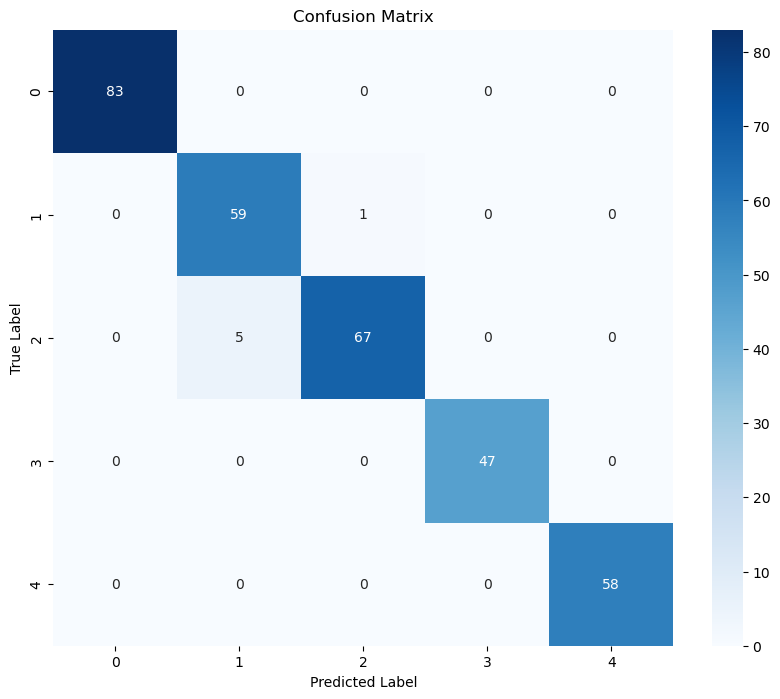

Test Result:
Accuracy Score: 86.25%
_______________________________________________
ROC AUC Score: 99.77%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1          2          3          4  accuracy  \
precision   1.000000  0.636364   0.764706   0.875000   0.875000    0.8625   
recall      0.965517  0.875000   0.764706   0.583333   1.000000    0.8625   
f1-score    0.982456  0.736842   0.764706   0.700000   0.933333    0.8625   
support    29.000000  8.000000  17.000000  12.000000  14.000000    0.8625   

           macro avg  weighted avg  
precision   0.830214      0.873011  
recall      0.837711      0.862500  
f1-score    0.823467      0.860658  
support    80.000000     80.000000  
_______________________________________________
Confusion Matrix: 
 [[28  1  0  0  0]
 [ 0  7  1  0  0]
 [ 0  3 13  1  0]
 [ 0  0  3  7  2]
 [ 0  0  0  0 14]]



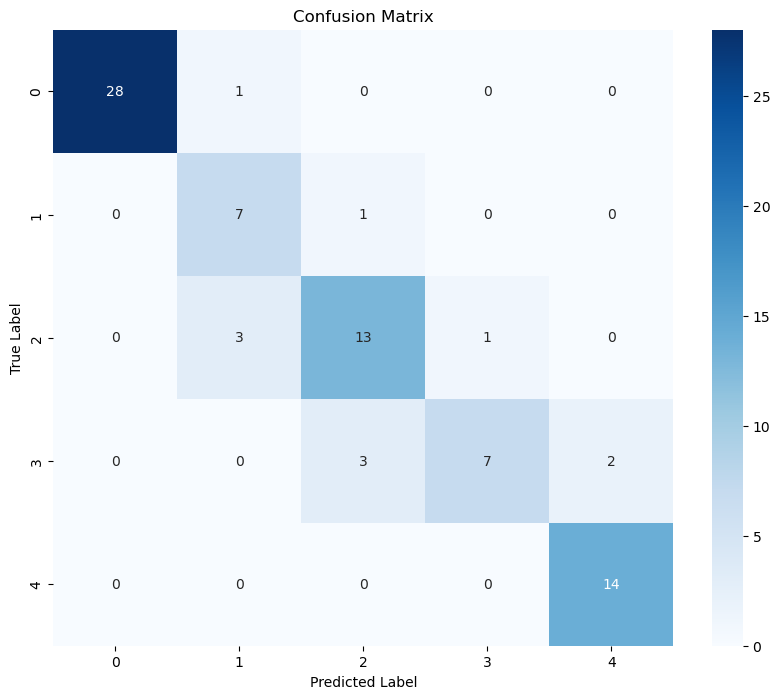

In [46]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param_grid['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
param_grid['C'] = loguniform.rvs(1e-5, 100, size=10)

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
lr_acc, lr_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

### KNN

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best params: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2     3     4  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    83.0  60.0  72.0  47.0  58.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[83  0  0  0  0]
 [ 0 60  0  0  0]
 [ 0  0 72  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 58]]



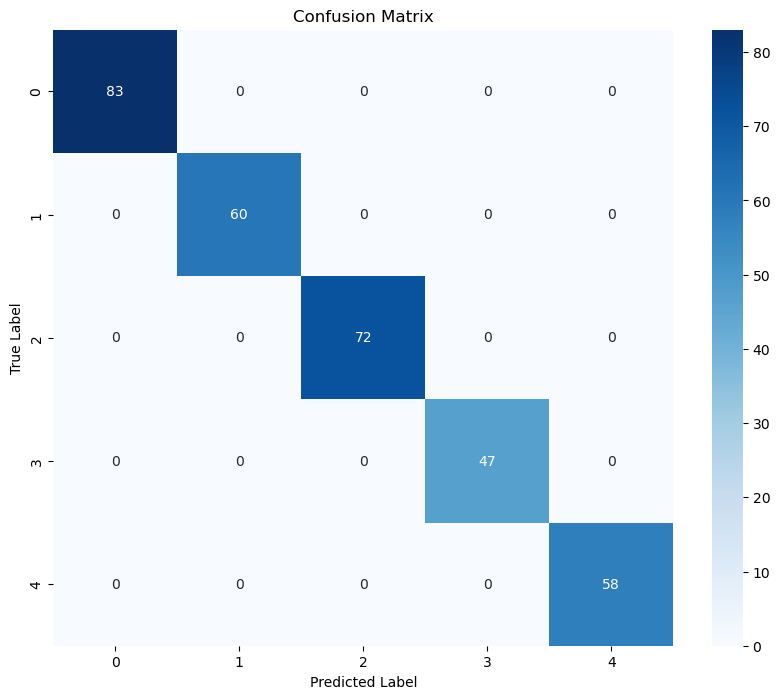

Test Result:
Accuracy Score: 68.75%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1          2          3          4  accuracy  \
precision   0.961538  0.500000   0.500000   0.500000   0.750000    0.6875   
recall      0.862069  0.875000   0.647059   0.250000   0.642857    0.6875   
f1-score    0.909091  0.636364   0.564103   0.333333   0.692308    0.6875   
support    29.000000  8.000000  17.000000  12.000000  14.000000    0.6875   

           macro avg  weighted avg  
precision   0.642308      0.711058  
recall      0.655397      0.687500  
f1-score    0.627040      0.684207  
support    80.000000     80.000000  
_______________________________________________
Confusion Matrix: 
 [[25  3  1  0  0]
 [ 0  7  1  0  0]
 [ 1  3 11  2  0]
 [ 0  0  6  3  3]
 [ 0  1  3  1  9]]



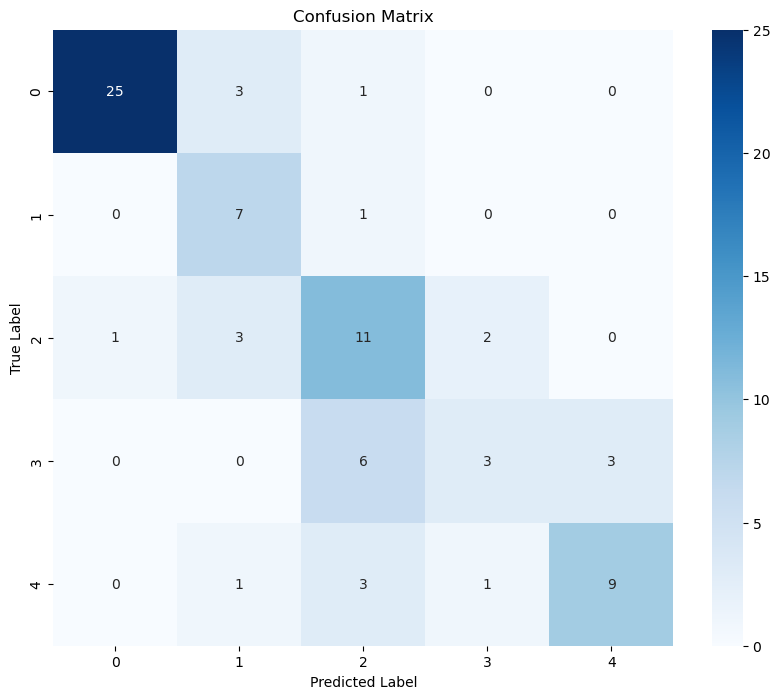

In [47]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [i for i in range(1, 50, 10)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [i for i in range(1, 50, 10)],
             "p": [1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
knn_acc, knn_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

### Decision Tree

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best params: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2     3     4  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    83.0  60.0  72.0  47.0  58.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[83  0  0  0  0]
 [ 0 60  0  0  0]
 [ 0  0 72  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 58]]



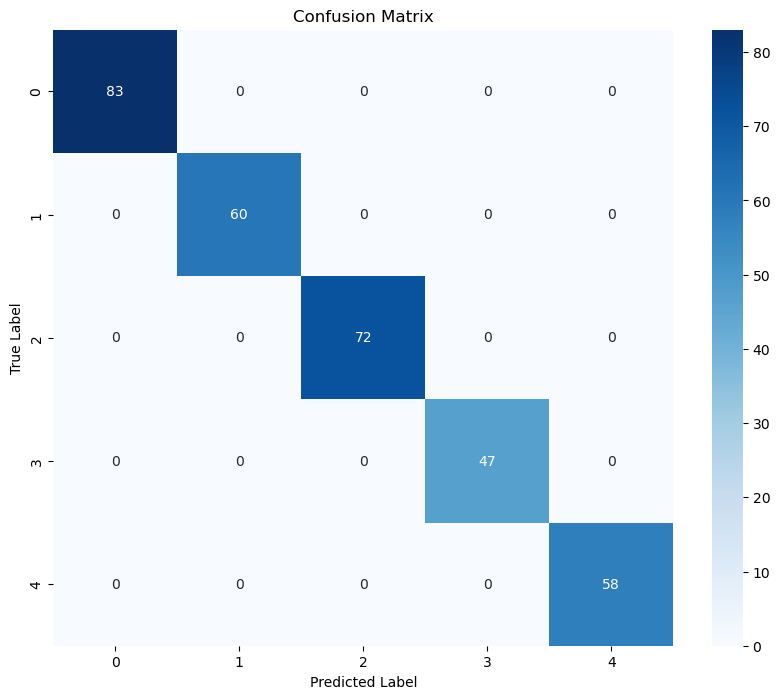

Test Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0    1     2     3     4  accuracy  macro avg  weighted avg
precision   1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    29.0  8.0  17.0  12.0  14.0       1.0       80.0          80.0
_______________________________________________
Confusion Matrix: 
 [[29  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 14]]



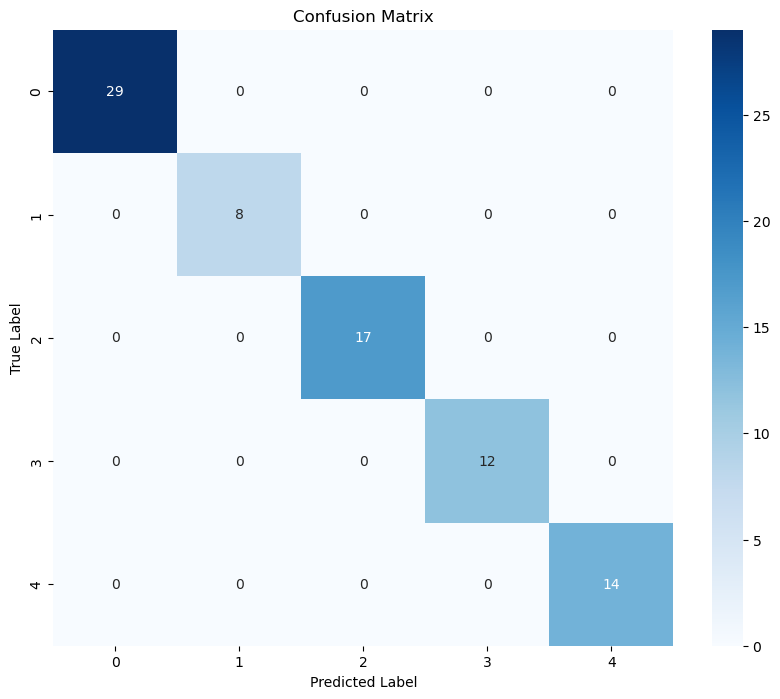

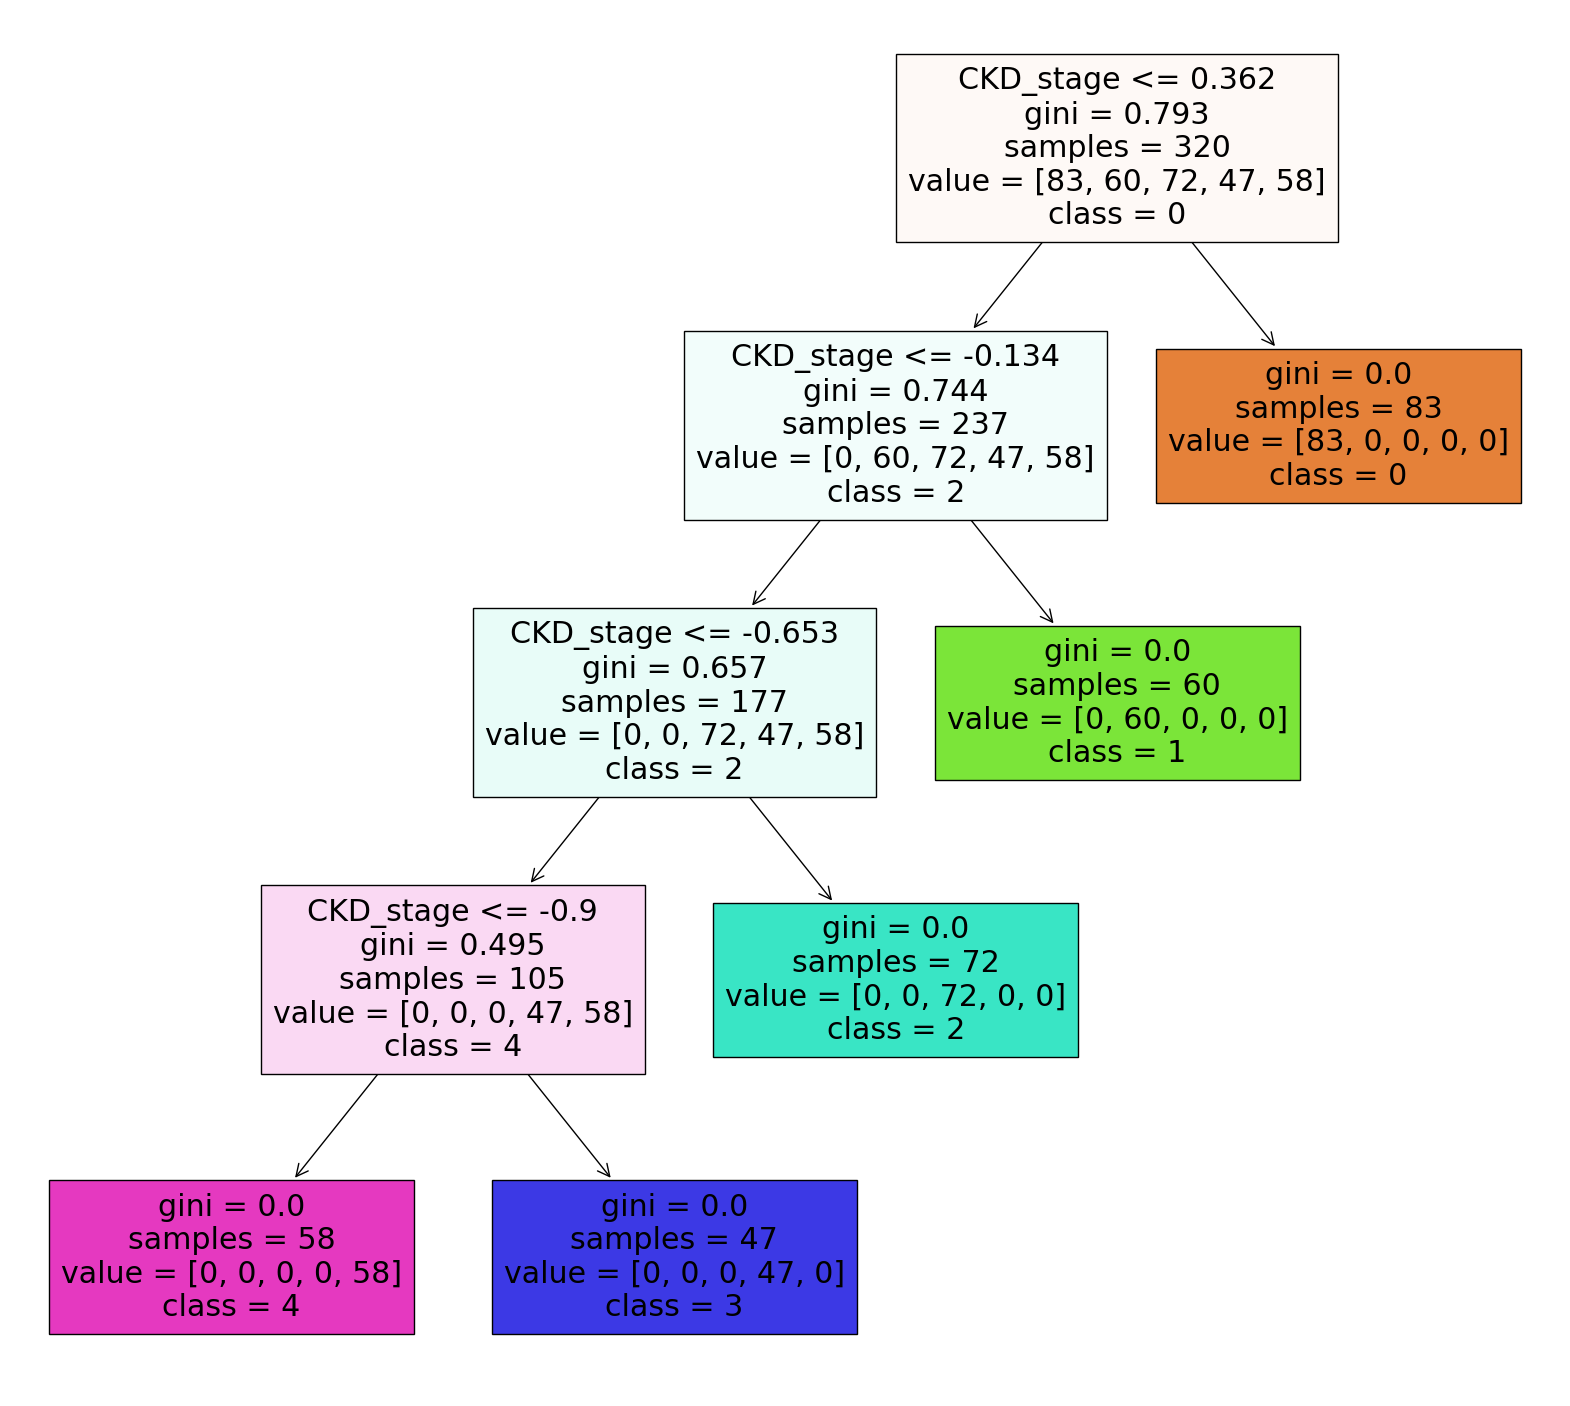

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {"max_depth": [3, 5, 7, 10, 15, 20, None],
              "max_features": [None, 'sqrt', 'log2'],
              "min_samples_leaf": [1, 3, 5, 10, 20],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)
dump(model,"../model/DT.joblib")
print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
dtc_acc, dtc_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
plt.figure(figsize=(20, 18))
tree.plot_tree(model, feature_names = df.columns.tolist()[1:], filled=True, class_names=["0", "1","2","3","4"])
plt.show()

### Random Forest

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2     3     4  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    83.0  60.0  72.0  47.0  58.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[83  0  0  0  0]
 [ 0 60  0  0  0]
 [ 0  0 72  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 58]]



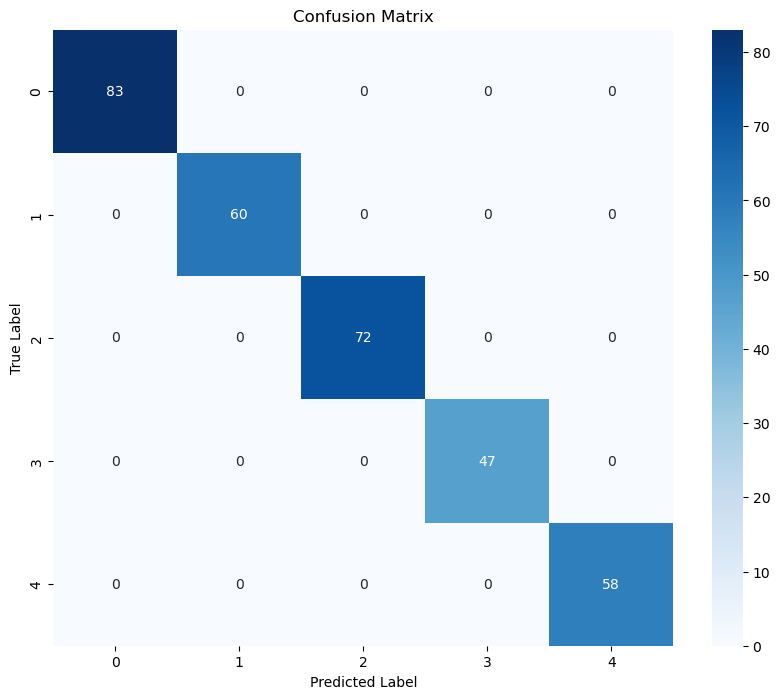

Test Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0    1     2     3     4  accuracy  macro avg  weighted avg
precision   1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    29.0  8.0  17.0  12.0  14.0       1.0       80.0          80.0
_______________________________________________
Confusion Matrix: 
 [[29  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 14]]



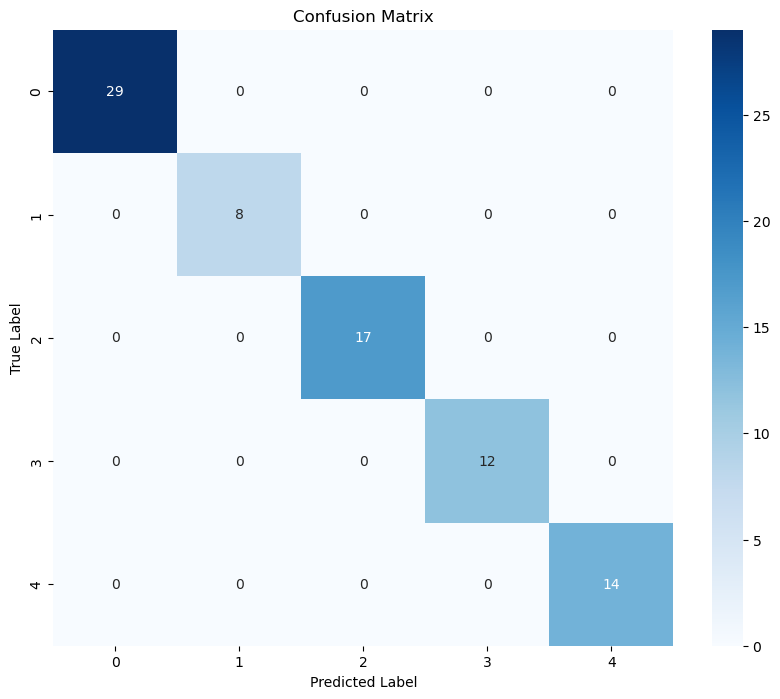

In [49]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'bootstrap': [True, False],
            'max_depth': [None, 5, 10, 15, 20],
            'max_features': [None, 'sqrt'],
            'min_samples_leaf': [1, 10, 20],
            'min_samples_split': [2, 10, 20],
            'n_estimators': [50, 100]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
rd_clf_acc, rd_clf_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)


### Models Results and Comparison

In [50]:
# Table Comparison on models
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc],
    'ROC/AUC Score' : [lr_ra, knn_ra, dtc_ra, rd_clf_ra]})
    
models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,ROC/AUC Score
2,Decision Tree Classifier,100.00,100.000000
3,Random Forest Classifier,100.00,100.000000
0,Logistic Regression,86.25,98.145032
1,KNN,68.75,93.673549


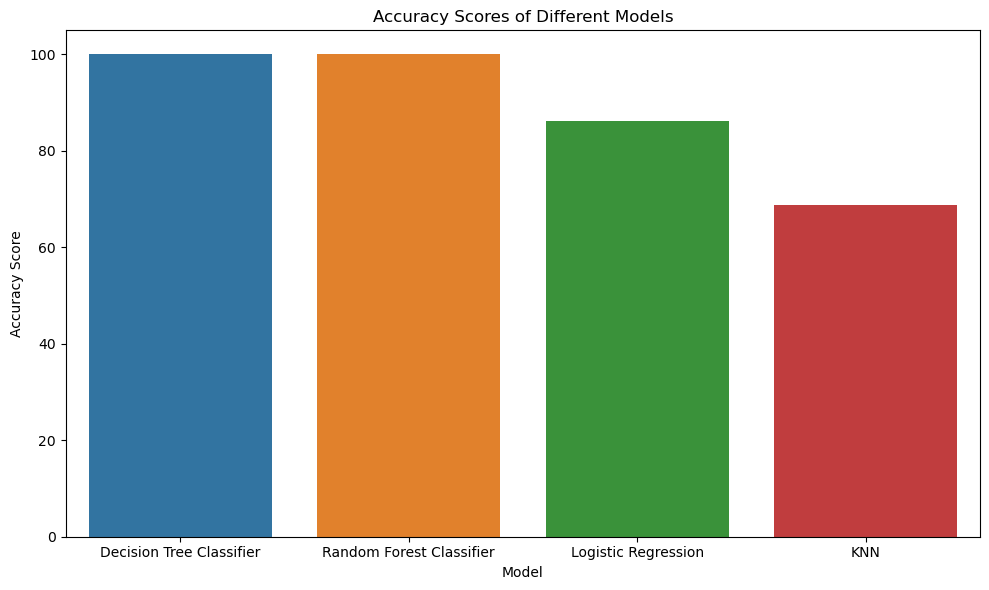

In [51]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=models.sort_values(by = 'Accuracy Score', ascending = False), x='Model', y='Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()